## **DATA COLLECTION**

**Loading Data**

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('Crop Production data.csv')

In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15831 entries, 0 to 15830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15831 non-null  object 
 1   District_Name  15830 non-null  object 
 2   Crop_Year      15830 non-null  float64
 3   Season         15830 non-null  object 
 4   Crop           15830 non-null  object 
 5   Area           15830 non-null  float64
 6   Production     15760 non-null  float64
dtypes: float64(3), object(4)
memory usage: 865.9+ KB


## **DATA PREPROCESSING**

**Data Cleaning**

In [6]:
data.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
15826,False,False,False,False,False,False,False
15827,False,False,False,False,False,False,False
15828,False,False,False,False,False,False,False
15829,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

,0
State_Name,0
District_Name,1
Crop_Year,1
Season,1
Crop,1
Area,1
Production,71


In [8]:
data.fillna(0,inplace=True)

In [9]:
data.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


**Classified into Categorical and Numerical Columns**

In [10]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object':
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['Crop_Year', 'Area', 'Production']
categorical Columns : ['State_Name', 'District_Name', 'Season', 'Crop']


**Outlier Detection And Removal**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Before Outlier Removing:  Crop_Year


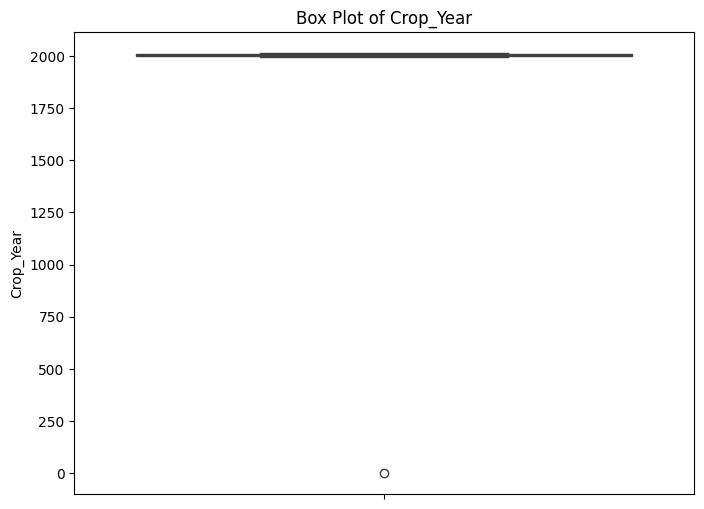

After Outlier Removing:  Crop_Year


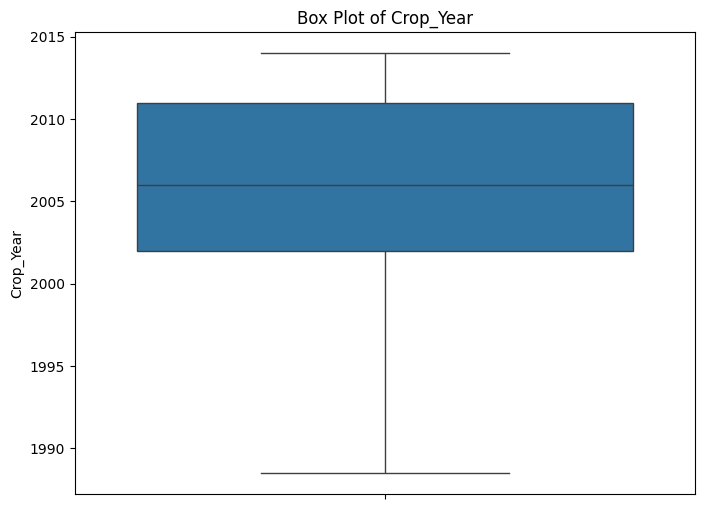

Before Outlier Removing:  Area


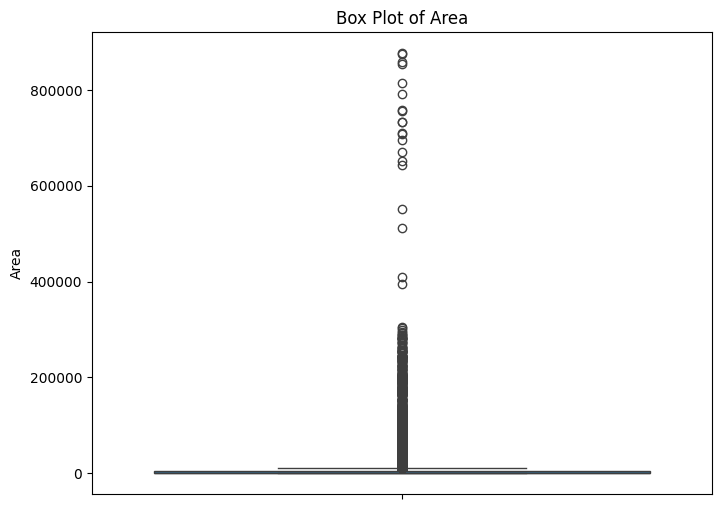

After Outlier Removing:  Area


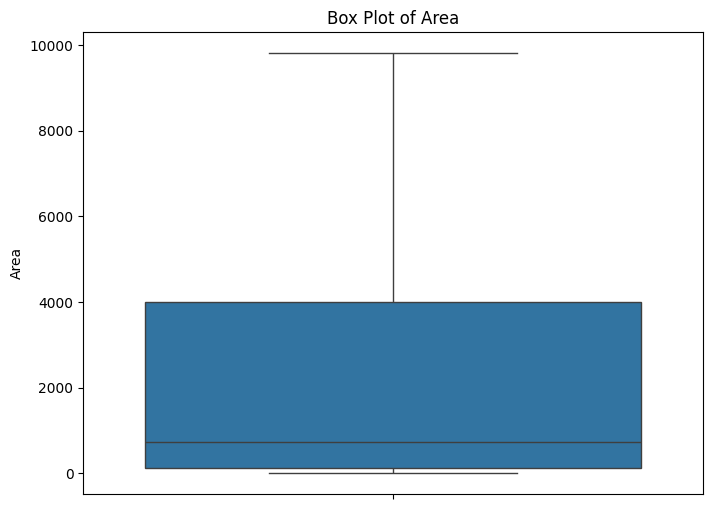

Before Outlier Removing:  Production


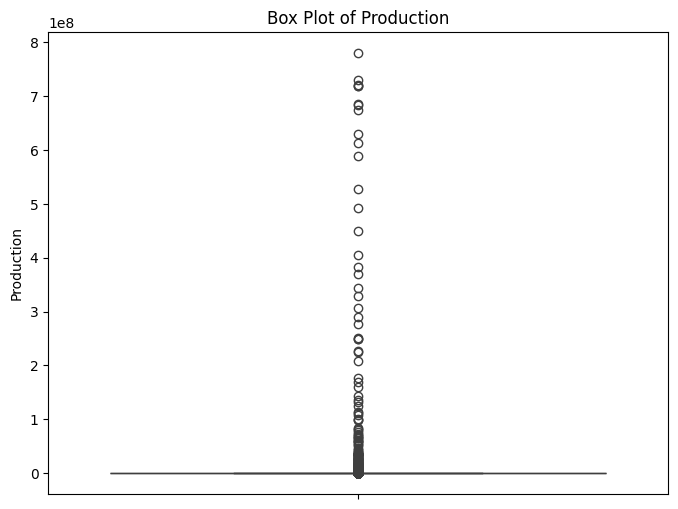

After Outlier Removing:  Production


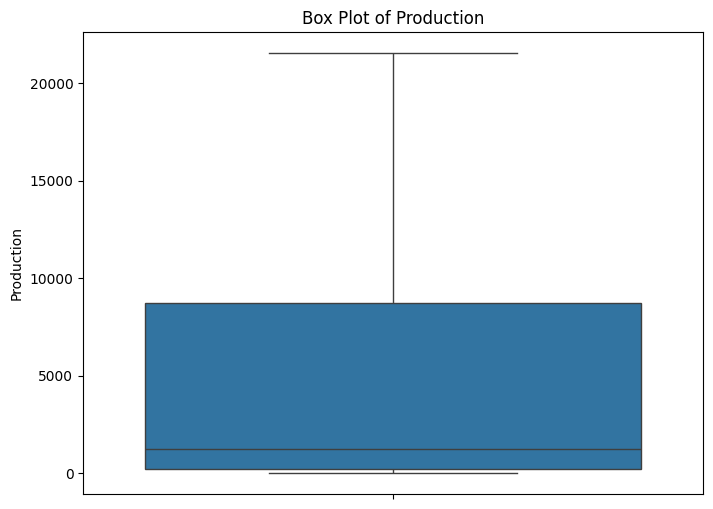

In [13]:
#outlier is removed using iqr method
for column in numerical_columns:

    print("Before Outlier Removing: ",column)

    boxplot(column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data.loc[(data[column] < lower_bound),column] = lower_bound
    data.loc[(data[column] > upper_bound),column] = upper_bound

    boxplot(column)



## **DATA VISUALIZATION**

**Crop production over the years**

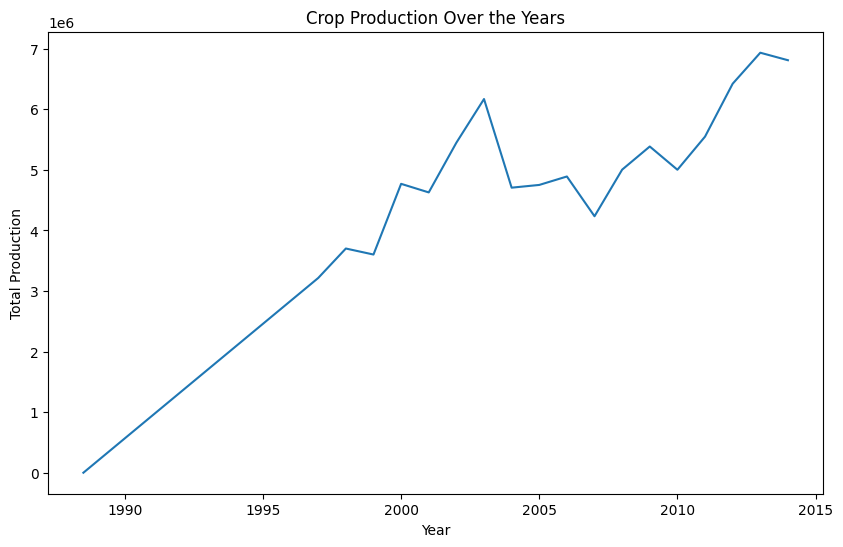

In [14]:
# Crop production over the years
crop_year = data.groupby('Crop_Year')
crop_year = crop_year['Production'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=crop_year.index, y=crop_year.values)
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

**Top Crops by Production**

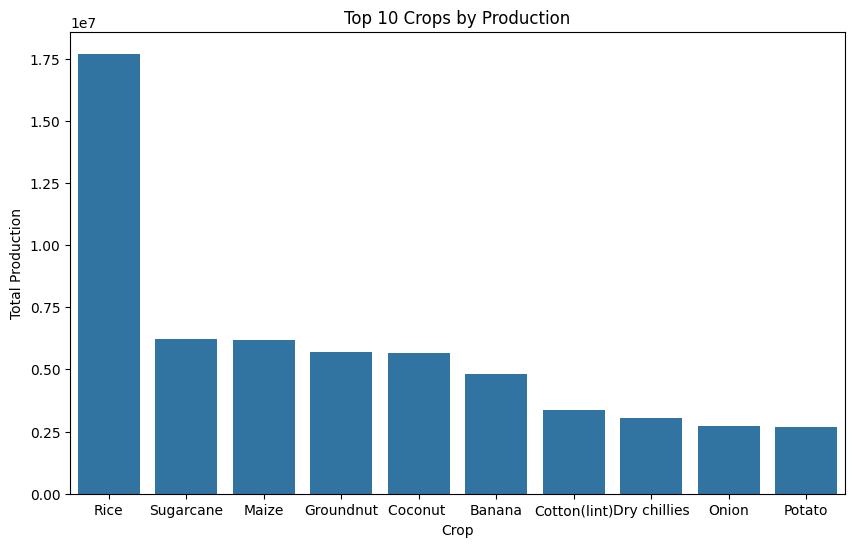

In [15]:
# Top crops by production
top_crops = data.groupby('Crop')['Production'].sum()
top_crops = top_crops.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crops.index, y=top_crops.values)
plt.title('Top 10 Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()

**Crop Production by Season**

In [16]:
data['Season'] = data['Season'].astype(str)
data['State_Name'] = data['State_Name'].astype(str)
data['District_Name'] = data['District_Name'].astype(str)
data['Crop'] = data['Crop'].astype(str)

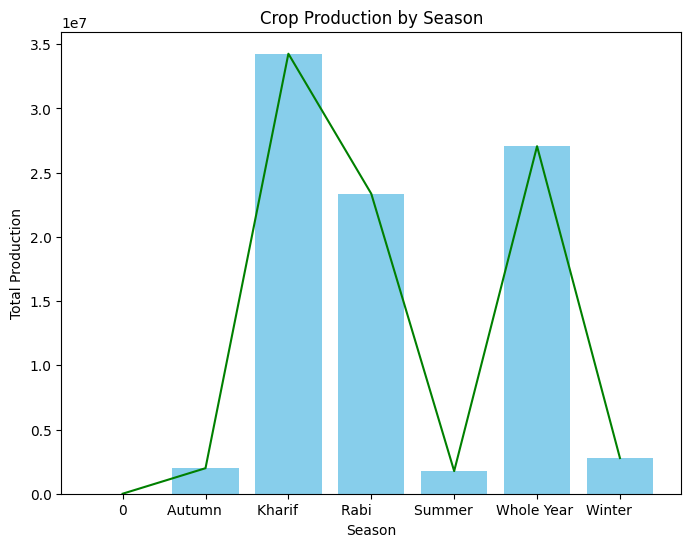

In [17]:
season_crop = data.groupby('Season')
season_crop = season_crop['Production'].sum()

plt.figure(figsize=(8,6))
plt.bar(season_crop.index,season_crop.values,color='skyblue')
sns.lineplot(x=season_crop.index,y=season_crop.values,color='green')
plt.title('Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.show()


**Total Crop Production by State**

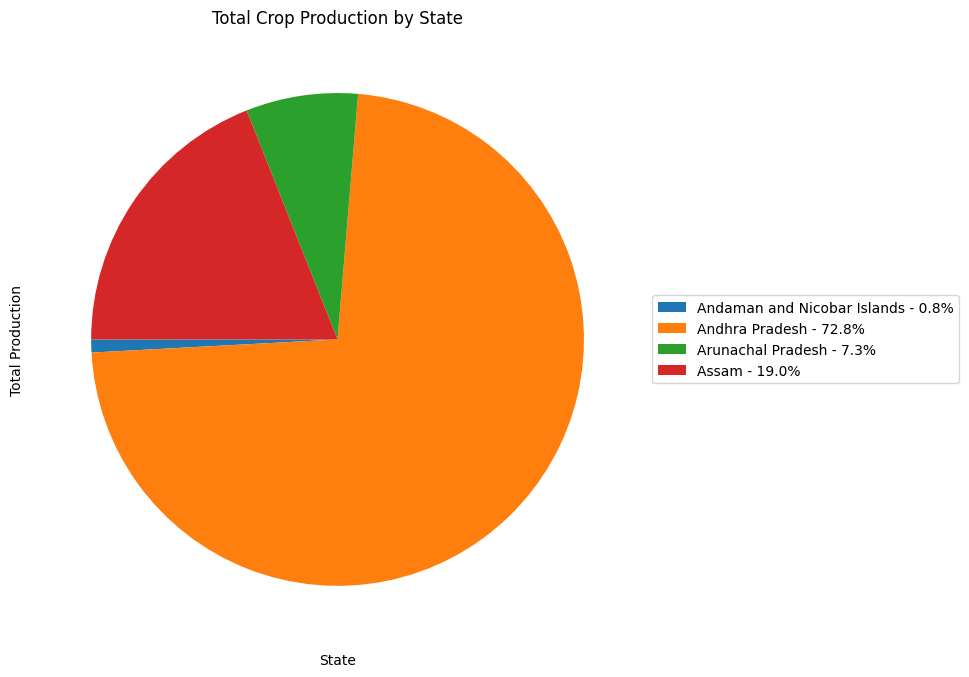

In [18]:
state_crops = data.groupby(['State_Name','Crop'])['Production'].sum()


state_production = state_crops.groupby('State_Name').sum()

# Plotting
plt.figure(figsize=(15, 8))
patches, _ = plt.pie(state_production.values, labels=None, autopct=None, startangle=180)  # Disable labels and autopct
plt.title('Total Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Calculate percentages manually
percentages = (state_production.values / state_production.values.sum()) * 100
legend_labels = [f'{state} - {percent:.1f}%' for state, percent in zip(state_production.index, percentages)]

# Create a custom legend with state names, colors, and percentages
plt.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


## **FEATURE ENGINEERING**

In [19]:
categorical_columns.pop(0)

'State_Name'

In [20]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [21]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

In [22]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

District_Name
Season
Crop


In [23]:
encoding_mapping

{'District_Name': {'0': 0,
  'ANANTAPUR': 1,
  'ANJAW': 2,
  'BAKSA': 3,
  'BARPETA': 4,
  'BONGAIGAON': 5,
  'CACHAR': 6,
  'CHANGLANG': 7,
  'CHIRANG': 8,
  'CHITTOOR': 9,
  'DARRANG': 10,
  'DHEMAJI': 11,
  'DIBANG VALLEY': 12,
  'EAST GODAVARI': 13,
  'EAST KAMENG': 14,
  'EAST SIANG': 15,
  'GUNTUR': 16,
  'KADAPA': 17,
  'KRISHNA': 18,
  'KURNOOL': 19,
  'KURUNG KUMEY': 20,
  'LOHIT': 21,
  'LONGDING': 22,
  'LOWER DIBANG VALLEY': 23,
  'LOWER SUBANSIRI': 24,
  'NAMSAI': 25,
  'NICOBARS': 26,
  'NORTH AND MIDDLE ANDAMAN': 27,
  'PAPUM PARE': 28,
  'PRAKASAM': 29,
  'SOUTH ANDAMANS': 30,
  'SPSR NELLORE': 31,
  'SRIKAKULAM': 32,
  'TAWANG': 33,
  'TIRAP': 34,
  'UPPER SIANG': 35,
  'UPPER SUBANSIRI': 36,
  'VISAKHAPATANAM': 37,
  'VIZIANAGARAM': 38,
  'WEST GODAVARI': 39,
  'WEST KAMENG': 40,
  'WEST SIANG': 41},
 'Season': {'0': 0,
  'Autumn     ': 1,
  'Kharif     ': 2,
  'Rabi       ': 3,
  'Summer     ': 4,
  'Whole Year ': 5,
  'Winter     ': 6},
 'Crop': {'0': 0,
  'Arecanut

In [24]:
# Create a new dictionary with stripped keys for the 'Season' key
encoding_mapping['Season'] = {key.strip(): value for key, value in encoding_mapping['Season'].items()}

In [25]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,26,2000.0,2,1,1254.0,2000.0
1,Andaman and Nicobar Islands,26,2000.0,2,44,2.0,1.0
2,Andaman and Nicobar Islands,26,2000.0,2,57,102.0,321.0
3,Andaman and Nicobar Islands,26,2000.0,5,4,176.0,641.0
4,Andaman and Nicobar Islands,26,2000.0,5,12,720.0,165.0


## **MODEL SELECTION and MODEL EVALUATION**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Prepare the data for modeling
X = data.drop(['Production','State_Name'], axis=1)
y = data['Production']

In [28]:
X = scalerx.fit_transform(X)

In [29]:

# Convert the Pandas Series to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


In [30]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **Linear Regression**

In [31]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [32]:
y_linear_pred

array([[-0.50832073],
       [-0.43365044],
       [ 1.47285419],
       ...,
       [-0.61063546],
       [-0.91494672],
       [-0.02884541]])

In [33]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.42195177326090344, R2: 0.5807619290042176


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15831 entries, 0 to 15830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15831 non-null  object 
 1   District_Name  15831 non-null  int64  
 2   Crop_Year      15831 non-null  float64
 3   Season         15831 non-null  int64  
 4   Crop           15831 non-null  int64  
 5   Area           15831 non-null  float64
 6   Production     15831 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 865.9+ KB


**Predicted vs Actual plot**

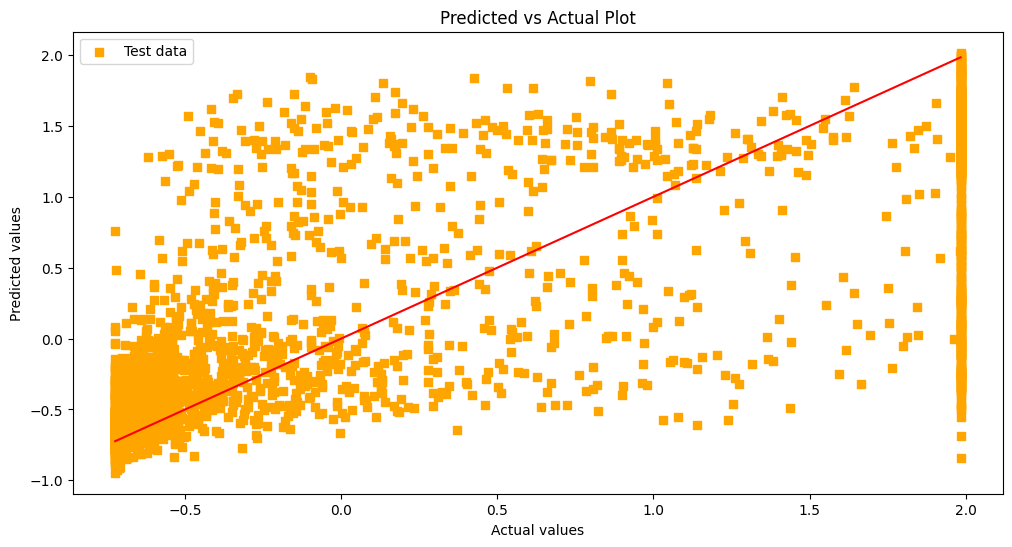

In [35]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Decision Tree Regressor**

In [36]:
decision_model = DecisionTreeRegressor()

decision_model.fit(X_train, y_train)

y_decision_pred = decision_model.predict(X_test)

In [37]:
y_decision_pred

array([-0.54320785, -0.41197599,  1.98385389, ..., -0.59851629,
       -0.69907711, -0.08867299])

In [38]:
mse_dt = mean_squared_error(y_test, y_decision_pred)

r2_dt = r2_score(y_test, y_decision_pred)


print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.14008128915159937, R2: 0.860819616913409


**Predicted vs Actual plot**

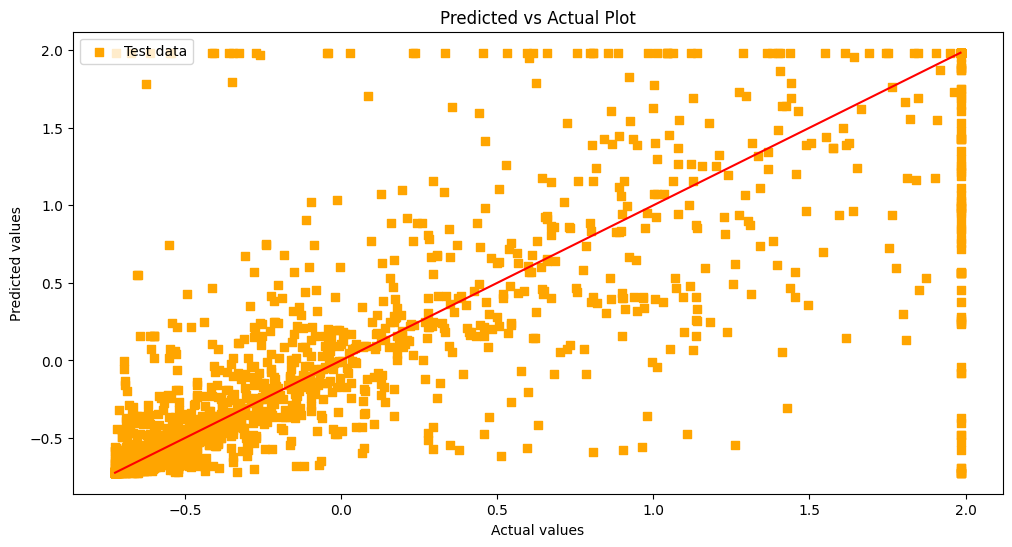

In [39]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_decision_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Random Forest Regressor**

In [40]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [41]:
y_random_pred

array([-0.54805111, -0.49820437,  1.05624169, ..., -0.63509707,
       -0.699776  ,  0.14847926])

In [42]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.08263699543837931, R2: 0.9178944686196359


**Predicted vs Actual plot**

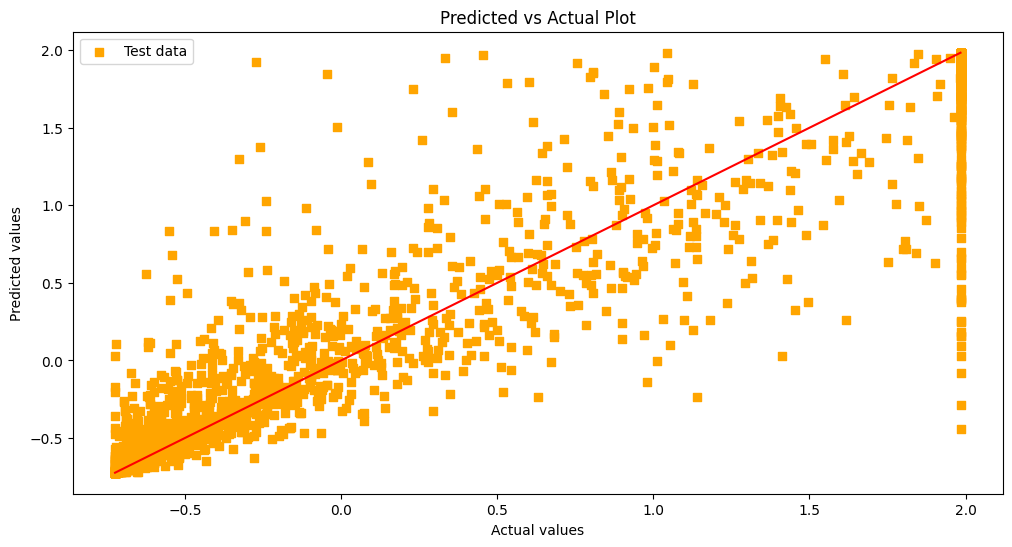

In [43]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_random_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Support Vector Regressor (SVR)**

In [44]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
y_svr_pred

array([-0.56983929, -0.62796838,  1.54452047, ..., -0.54489279,
       -0.82208588, -0.10278609])

In [47]:
mse_svr = mean_squared_error(y_test, y_random_pred)

r2_svr = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_svr}, R2: {r2_svr}')

Random Forest - MSE: 0.08263699543837931, R2: 0.9178944686196359


**Predicted vs Actual plot**

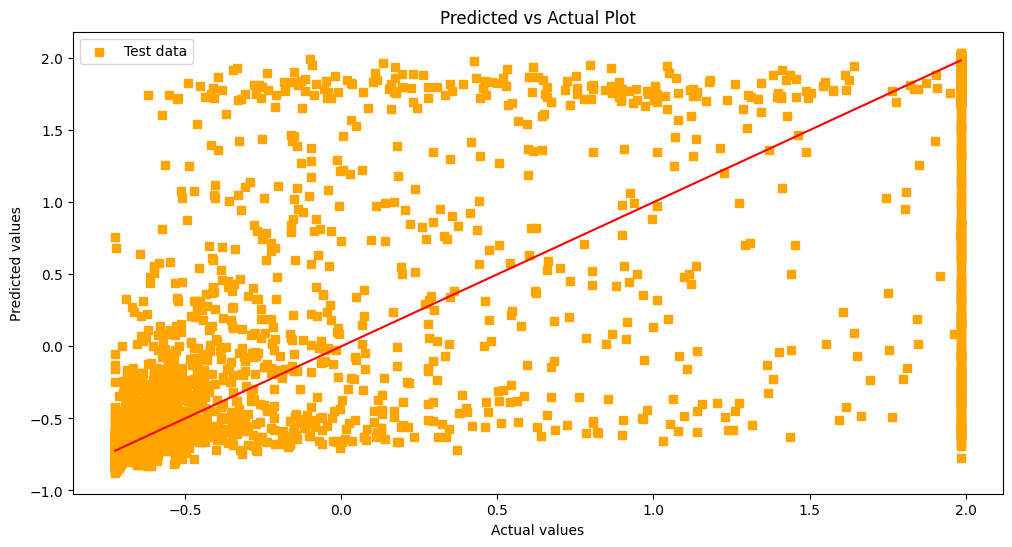

In [48]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_svr_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

## **COMPARISON OF MODELS**

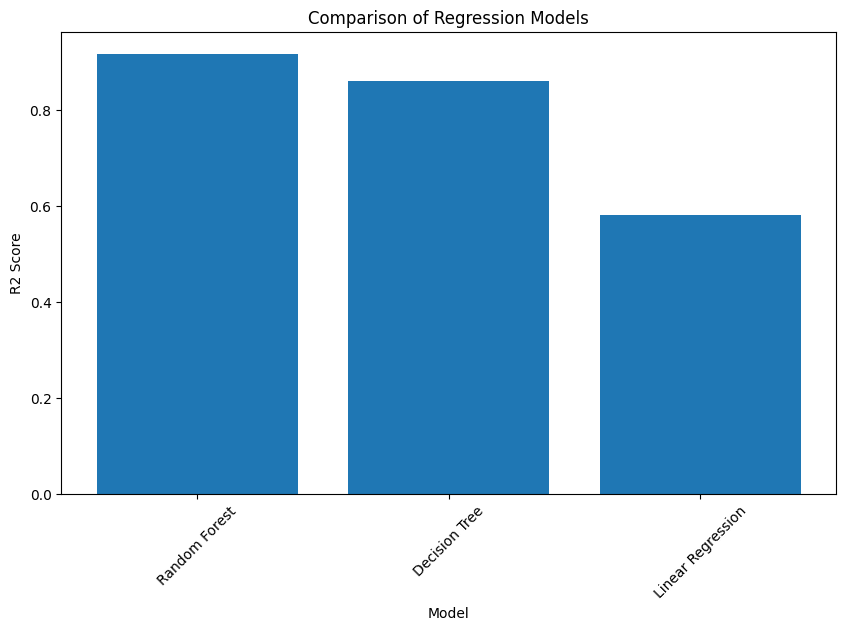

In [49]:

# Create a dictionary to store model names and their MSE values
models_r2 = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    #"svr" : r2_svr

}

# Sort models by descending order of accuracy
sorted_models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2.keys(), sorted_models_r2.values())
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()


## **NEW PREDICTIONS**

**Testing for New Inputs**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15831 entries, 0 to 15830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15831 non-null  object 
 1   District_Name  15831 non-null  int64  
 2   Crop_Year      15831 non-null  float64
 3   Season         15831 non-null  int64  
 4   Crop           15831 non-null  int64  
 5   Area           15831 non-null  float64
 6   Production     15831 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 865.9+ KB


In [51]:
def val(column_name, target_key):
    # Accessing the encoding mapping for the specified column
    return encoding_mapping[column_name].get(target_key)


In [52]:
district = val('District_Name','KOTTAYAM')
season = val('Season','Whole Year')
crop = val('Crop','Rice')

In [53]:
import numpy as np

# Given inputs
#inputs = np.array([State_Name, District_Name, Crop_Year, Season, Crop, Area, Production])
inputs = np.array([district,2024,season,crop,1855])


In [54]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Prediction**

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Example new input data with NaNs
new_inputs = np.array([[1.5], [2.5], [np.nan], [4.5], [5.5]])

# Remove samples with NaN values
new_inputs = new_inputs[~np.isnan(new_inputs).any(axis=1)]

# Fit a simple linear regression model (for example purposes)
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([1.1, 1.9, 3.0, 4.1, 5.1])
random_model = LinearRegression()
random_model.fit(X_train, y_train)

# Make predictions and reshape the output
new_pred = random_model.predict(new_inputs).reshape(-1, 1)

print(new_pred)


[[1.51]
 [2.53]
 [4.57]
 [5.59]]


In [57]:
n_pred = scalery.inverse_transform(new_pred)

In [58]:
print("Prediction of Crop Production : ", n_pred[0][0] )

Prediction of Crop Production :  17774.059684833966
